[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guiwitz/DLImaging/blob/master/notebooks/03-Tensors.ipynb)

# 3. Tensor calculations

We have seen in the previous cahtper that we need to use a specific type of array (matrix) in the frame of PyTorch based neural networks, namely tensors. These tensors are very similar to Numpy arrays but with additional specific functionalities needed for deep learning. There is an ongoing effort to make the switch between different array/tensor formats (numpy, tensors, xarray etc.) more transparent in the future, but for the moment let's briefly explore the PyTorch tensors, accessible from the ```torch``` module:

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Creating arrays

Numpy and Pytorch share a lot of functions and methods so you wont feel completely lost. For example you can create arrays filled with ones:

In [2]:
t_array = torch.ones((3,2))
t_array

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [3]:
n_array = np.ones((3,2))
n_array

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

You can also find the type of the array with ```dtype```:

In [4]:
print(f't_array dtype: {t_array.dtype}')
print(f'n_array dtype: {n_array.dtype}')

t_array dtype: torch.float32
n_array dtype: float64


Pytorch implements as well many other function to create arrays that are very similar to Numpy. For example random number arrays:

In [5]:
t_random = torch.randint(0,255,(10,10))

Finally you can easily transform Numpy arrays into Pytorch tensors:

In [6]:
t_from_n = torch.tensor(n_array)
t_from_n

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64)

And the reverse is true as well: you can recover a Numpy array from a Pytorch tensor:

In [7]:
t_from_n.numpy()

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Finally, Pytorch tensors are also compatible with Matplotlib, so you can easily have a look at them using e.g. ```imshow``` for 2D tensors:

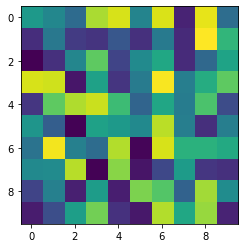

In [9]:
plt.imshow(t_random);

## Indexing, broadcasting etc.

The powerful logic behind Numpy that allows for a very efficient selection and combination of elements in arrays is also conserved in Pytorch. For example regular indexing:

In [10]:
t_random

tensor([[140, 120,  92, 222, 238, 117, 239,  31, 244,  94],
        [ 38, 105,  49,  43,  73,  40, 107,  35, 253, 169],
        [  6,  40, 119, 192,  57, 124, 153,  36,  89, 149],
        [238, 235,  21, 147,  44, 109, 251, 112, 159, 192],
        [ 45, 192, 224, 233, 175,  86, 152, 110, 183,  63],
        [135,  80,   7, 147, 140, 123, 227, 112,  39, 112],
        [100, 249, 114,  93, 225,   9, 238, 164, 164, 156],
        [123, 125, 226,   7, 209,  20,  60, 142,  45,  40],
        [ 57, 114,  28, 143,  27, 204, 187,  84, 219, 126],
        [ 25,  65, 144, 200,  41,  22, 225, 153, 215,  31]])

In [11]:
t_random[0,:]

tensor([140, 120,  92, 222, 238, 117, 239,  31, 244,  94])

or broadcasting that allows to combine tensors of different but compatible shapes:

In [12]:
torch.ones((3,5)) * torch.randint(0,255, (1,5))

tensor([[193., 242., 134.,  51., 199.],
        [193., 242., 134.,  51., 199.],
        [193., 242., 134.,  51., 199.]])

We will see that very often we also need to flatten arrays for example to create a fully connected layer in a deep learning network. This can be done in two ways. You can use the ```flatten``` function/method:

In [13]:
t_random.flatten()

tensor([140, 120,  92, 222, 238, 117, 239,  31, 244,  94,  38, 105,  49,  43,
         73,  40, 107,  35, 253, 169,   6,  40, 119, 192,  57, 124, 153,  36,
         89, 149, 238, 235,  21, 147,  44, 109, 251, 112, 159, 192,  45, 192,
        224, 233, 175,  86, 152, 110, 183,  63, 135,  80,   7, 147, 140, 123,
        227, 112,  39, 112, 100, 249, 114,  93, 225,   9, 238, 164, 164, 156,
        123, 125, 226,   7, 209,  20,  60, 142,  45,  40,  57, 114,  28, 143,
         27, 204, 187,  84, 219, 126,  25,  65, 144, 200,  41,  22, 225, 153,
        215,  31])

Here you can also specify which *contiguous* dimensions you want to flatten e.g.:

In [14]:
t_3d = torch.randint(0,100,(2,3,4))
t_3d

tensor([[[23, 67, 96, 77],
         [85, 53, 13, 83],
         [91,  8, 23, 88]],

        [[96, 16,  1, 18],
         [96, 96,  6, 55],
         [19,  7, 97, 60]]])

In [15]:
torch.flatten(t_3d, start_dim=1, end_dim=2)

tensor([[23, 67, 96, 77, 85, 53, 13, 83, 91,  8, 23, 88],
        [96, 16,  1, 18, 96, 96,  6, 55, 19,  7, 97, 60]])

The alternative is to use the ```view``` method, which, if possible, returns only a ```view``` of the array. You can pass compatible dimensions to reshape the tensor, or simple use ```-1``` to completely flatten it. 

In [16]:
t_random = torch.randint(0,255,(10,10))

In [17]:
t_random.view(5, 20)

tensor([[130, 134,  63,  67,  49, 141, 235, 237, 178, 150, 249, 157,  69, 116,
           6, 142, 129, 109,   3, 214],
        [ 34, 219,  23,  11,  48, 229,  65, 220,  87, 139,  68, 211, 130, 197,
         198,  70, 218, 208, 200,  62],
        [ 32, 200, 175, 240, 199,  63, 179, 228, 248, 206, 244, 229,  49, 163,
          69, 170, 226,  98,  49,  84],
        [203, 185, 208,  76, 132,  39, 244, 142, 175, 132, 180,  59,  38, 126,
         216, 253,  70, 231, 129, 202],
        [ 10,  21, 221, 126, 215, 206, 216, 211, 245, 168, 159,   9,  54,  49,
          78, 228,  41, 180,  17, 110]])

In [18]:
t_random.view(-1)

tensor([130, 134,  63,  67,  49, 141, 235, 237, 178, 150, 249, 157,  69, 116,
          6, 142, 129, 109,   3, 214,  34, 219,  23,  11,  48, 229,  65, 220,
         87, 139,  68, 211, 130, 197, 198,  70, 218, 208, 200,  62,  32, 200,
        175, 240, 199,  63, 179, 228, 248, 206, 244, 229,  49, 163,  69, 170,
        226,  98,  49,  84, 203, 185, 208,  76, 132,  39, 244, 142, 175, 132,
        180,  59,  38, 126, 216, 253,  70, 231, 129, 202,  10,  21, 221, 126,
        215, 206, 216, 211, 245, 168, 159,   9,  54,  49,  78, 228,  41, 180,
         17, 110])

Since we are dealing with a ```view```, if we modify one of the arrays *in place*, the values in the other arrays are changed as well. This means that this is **not** and independent array but just a shallow-copy. Therefore be *careful*.

In [19]:
view_copy = t_random.view(5,20)
view_copy

tensor([[130, 134,  63,  67,  49, 141, 235, 237, 178, 150, 249, 157,  69, 116,
           6, 142, 129, 109,   3, 214],
        [ 34, 219,  23,  11,  48, 229,  65, 220,  87, 139,  68, 211, 130, 197,
         198,  70, 218, 208, 200,  62],
        [ 32, 200, 175, 240, 199,  63, 179, 228, 248, 206, 244, 229,  49, 163,
          69, 170, 226,  98,  49,  84],
        [203, 185, 208,  76, 132,  39, 244, 142, 175, 132, 180,  59,  38, 126,
         216, 253,  70, 231, 129, 202],
        [ 10,  21, 221, 126, 215, 206, 216, 211, 245, 168, 159,   9,  54,  49,
          78, 228,  41, 180,  17, 110]])

In [20]:
view_copy.fill_(1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [21]:
t_random

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

## Gradients

To be able to perform backpropagation in Deep Learning networks, we need to be able to calculate all the necessary gradients. This feature is "integrated" into Pytorch arrays directly if we use the ```requires_grad``` option. To start with a simple example, let's define first a variable $x=1$:

In [22]:
x = torch.ones(1, 1, requires_grad=True)

In [23]:
x

tensor([[1.]], requires_grad=True)

Now we let our variable pass through a few simple operations:

In [24]:
y = 2 * x

In [25]:
z = y**(3/2)

In [26]:
w = 5 * z

Our last variable that depends initially on ```x``` is now ```w```. We see that $w = f(z) = f(g(y)) = f(g(h(x))) = k(x)$ with:

$f(z) = 5*z$

$g(y) = y^{3/2}$

$h(x) = 2*x$

If ```w``` needs to be optimized with respect to the variablex x, following th chain rule, we need to calculate $k'(x) = f'(g(h(x))*g'(h(x))*h'(x)$

$5 * \frac{3}{2}(2x)^{0.5} * 2$


This complete calculation can simply be performed by calcualting the gradients of w $dw/dx$:

In [27]:
w.backward()

In [28]:
print(x.grad)

tensor([[21.2132]])


We can verify that we indeed obtain the correct gradient:

In [29]:
5 * (3/2)*(2**0.5) * 2


21.213203435596427

Of course this is an over-simplified example. Calculations become more complex when dealing with actual vectors or tensors but the principle remains the same.

Finally note that if you want to recover a Numpy array from a PyTorch tensor, or plot a PyTorch tensor with Matplotlib, you first have to *detach* it from the gradient calculation system (if necessary) to recover it:

In [30]:
x.numpy()

RuntimeError: ignored

In [31]:
x.detach().numpy()

array([[1.]], dtype=float32)

## Sending tensors to a GPU

If your computer is equipped with a compatible GPU or if you run the notebook on Google Colab with a GPU runtime, you can exploit Graphics card computing power. For that the data have to be "pushed" and "pulled" to and from that device. We will see later that we can push entire networks thre but for the moment we just send a tensor.

First we have to check wheter a GPU is available:

In [32]:
torch.cuda.is_available()

True

If yes we can device a GPU device (a CUDA device in fact):

In [37]:
dev = torch.device("cuda")
dev

device(type='cuda')

Finally we can send the data the the "CUDA" device:

In [40]:
mytensor = torch.randn((3,5))
mytensor = mytensor.to(dev)
mytensor

tensor([[ 0.1078, -1.2955,  0.9824, -2.2888, -0.9240],
        [ 1.1793, -1.8081, -1.4458, -1.2130,  0.9562],
        [-0.5964,  1.9136, -1.2986, -0.1035,  1.0607]], device='cuda:0')

In [41]:
mytensor.numpy()

TypeError: ignored

We see here that we have again difficulties getting the tensor "out" of PyTorch. This time not because it's part of a gradient but because it lives on the GPU. So we need to first copy it back to the CPU first:

In [42]:
mytensor_CPU = mytensor.cpu()

In [43]:
mytensor_CPU.numpy()

array([[ 0.10778594, -1.2954801 ,  0.98242337, -2.2888114 , -0.9239933 ],
       [ 1.1793374 , -1.8080784 , -1.4457537 , -1.2130216 ,  0.9561631 ],
       [-0.59640384,  1.9136024 , -1.2985845 , -0.10350052,  1.0606741 ]],
      dtype=float32)

You will regularly hit this kind of problems when writing your code, so remember these two potential issues when you want to *post-process* some tensor:
- you migth need to *detach* it from the gradient calculation
- you migth need to pull it out of the GPU
- for NN computation, you might need to push your data (tensors) to the GPU

## Exercises

1. Create a tensor of integers in the range 0-100 of size 16x16
2. Change its "gradient-status" by attaching it to gradient calculation
3. Solve the problem appearing in (2.) by creating a float32 tensor and attaching the gradient again
4. Flatten the array to 1d
5. Transform your flat tensor to a numpy array